In [1]:
# load packages
from imutils import face_utils
import imutils
import dlib
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from face_functions import *

In [2]:
# load the images
original_headshot = 'files/headshot.jpg'
original_art = 'files/artistic_portrait.jpg'
image1_name = 'files/headshot_post_nst.jpg'
image2_name = 'files/warped_aligned_art.jpg'

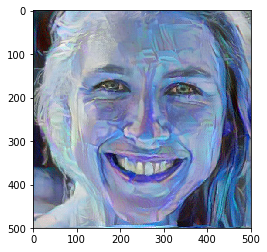

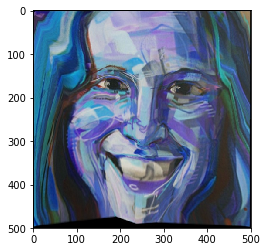

In [3]:
# load the images
image1_cropped  = cv2.imread(image1_name,cv2.IMREAD_COLOR)
image1_cropped = cv2.resize(image1_cropped,(500,500))
image1_cropped_shape = np.shape(image1_cropped)
plt.figure()
plt.imshow(image1_cropped)

image2_cropped  = cv2.imread(image2_name,cv2.IMREAD_COLOR)
image2_cropped = cv2.resize(image2_cropped,(500,500))
image2_cropped_shape = np.shape(image2_cropped)
plt.figure()
plt.imshow(image2_cropped)

In [4]:
# compute the face landmarks
# load the predictor from dlib
p = "files/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

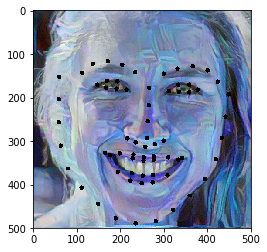

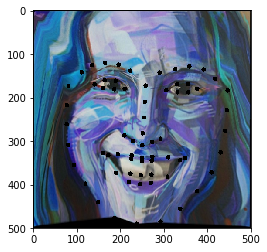

In [5]:
# compute the landmarks in the art and headshot faces
# for the art image
image1_points, image1_points1 = compute_landmarks(image1_cropped,detector,predictor)  

image1_points2 = []
for (x,y) in image1_points:
    if x >= image1_cropped_shape[1]:
        x = image1_cropped_shape[1] -1
    if y >= image1_cropped_shape[0]:
        y = image1_cropped_shape[0] -1
    image1_points2.append((x,y))
image1_points = image1_points2

# add landmarks to image and plot
image1_lm = draw_landmarks(image1_cropped, image1_points)
plt.figure()
plt.imshow(image1_lm)
cv2.imwrite('files/warped_headshot_lm.jpg',image1_lm)

# for the headshot image
image2_points, image2_points1 = compute_landmarks(image2_cropped,detector,predictor)

image2_points2 = []
for (x,y) in image2_points:
    if x >= image2_cropped_shape[1]:
        x = image2_cropped_shape[1] -1
    if y >= image2_cropped_shape[0]:
        y = image2_cropped_shape[0] -1
    image2_points2.append((x,y))
image2_points = image2_points2

# add landmarks to image and plot
image2_lm = draw_landmarks(image2_cropped, image2_points)
plt.figure()
plt.imshow(image2_lm)

In [6]:
# compute the convex hull for each image

hullPoints_image2, hullIndex_image2 = computeHullIndex(image2_points1, image2_points)
hullPoints_image1, hullIndex_image1 = computeHullIndex(image1_points1, image1_points)

# compute the convex hull for one image - corresponds to other
hull_image1 = []
hull_image2 = []
for i in range(0, len(hullIndex_image2)):
    hull_image1.append(image1_points[int(hullIndex_image2[i])])
    hull_image2.append(image2_points[int(hullIndex_image2[i])])

In [7]:
# find the final points for the image to use for triangulation
image1_points_final = hull_image1
image2_points_final = hull_image2

True

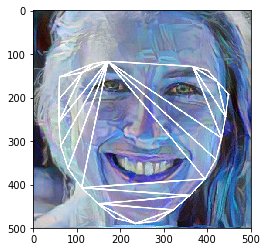

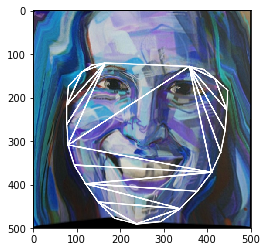

In [8]:
# find the Delaunay Triangulation for each image
dt_image1, image1_triangles = calculateDelaunayTriangles(image1_cropped, image1_points_final)
plt.figure()
plt.imshow(image1_triangles)
cv2.imwrite('files/warped_headshot_triangles.jpg',image1_triangles)

# find the Delaunay Triangulation for each image
dt_image2, image2_triangles  = calculateDelaunayTriangles(image2_cropped, image2_points_final)
plt.figure()
plt.imshow(image2_triangles)
cv2.imwrite('files/art_triangles_noborder.jpg',image2_triangles)

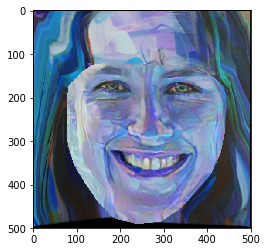

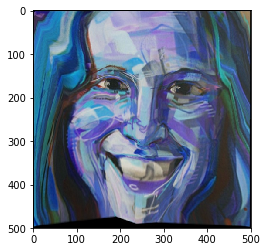

In [9]:
image1_warped = compute_warped_image(image1_cropped,image2_cropped,dt_image2,image1_points_final,image2_points_final)

plt.figure()
plt.imshow(image1_warped)
plt.figure()
plt.imshow(image2_cropped)

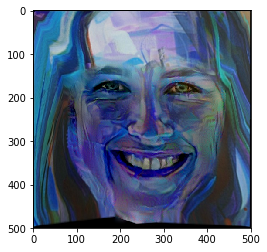

In [10]:
# compute the mask and clone into image
new_image, mask = clone_image(hullPoints_image2,image1_warped,image2_cropped)

plt.figure()
plt.imshow(new_image)

In [11]:
# get the bounding rectangle of the face in the original art image
art_orig  = cv2.imread(original_art,cv2.IMREAD_COLOR)
art_orig_faces, art_orig_face_detect, art_orig_cropped, art_orig_rectangle = compute_face_crop(art_orig)
art_orig_cropped_shape = np.shape(art_orig_cropped)

minx, miny, maxx, maxy = art_orig_rectangle 
padding = 0
bounding_box = [(minx,miny+padding),(maxx - padding,maxy - padding),(minx + padding,maxy - padding),(maxx - padding,miny + padding)]
new_image = cv2.resize(new_image,(maxx-minx,maxy-miny))

#blended_image = np.copy(art_orig)
#blended_image, mask = clone_image(bounding_box,new_image,art_orig)

blended_image[miny:maxy, minx:maxx,:] = new_image

original_image1  = cv2.imread(original_headshot,cv2.IMREAD_COLOR)

# plot things
plt.figure()
plt.imshow(original_image1)

plt.figure()
plt.imshow(blended_image)

plt.figure()
plt.imshow(art_orig)

NameError: name 'blended_image' is not defined

In [ ]:
print(bounding_box)
print(art_orig_rectangle)